## Import libraries

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display_html
import re
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

### Helper functions

In [2]:
# Replace spaces in the column names and categorical values
def replace_spaces(df):
    # Clean column names
    df.columns = df.columns.str.replace(' ', '_')

    # Loop through object (categorical) columns and replace spaces
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.replace(' ', '_')
        
    return df

def clean_column_names(df):
    """
    Cleans column names by removing units, percentages, parentheses, 
    and other special characters. Allows only letters and underscores.

    Args:
    df (pd.DataFrame): The DataFrame containing the columns to clean.

    Returns:
    df (pd.DataFrame): The DataFrame with cleaned column names.
    """
    # Use regex to replace any character that is not a letter or underscore
    df.columns = [re.sub(r'[^A-Za-z_]', '', col) for col in df.columns]
    
    return df

def clean_categorical_columns(df, original_columns=None):
    """
    Cleans up the DataFrame by removing original categorical columns once encoding is done.
    
    Args:
      df: The DataFrame after encoding.
      original_columns: A list of original columns that should be dropped if their encoded version exists.

    Returns:
      df: The cleaned DataFrame.
    """
    if original_columns:
        # Loop through the original columns to find and drop them
        for col in original_columns:
            encoded_columns = [col + '_encoded'] + [col_name for col_name in df.columns if col in col_name and col != col_name]
            
            # Drop the original column if encoded columns exist
            if any(encoded_columns):
                df = df.drop(columns=[col], errors='ignore')
    
    return df

def encode_categorical(df, columns_to_encode=None, encode_type=None):
    """
    Encode categorical columns using Label Encoding or One-Hot Encoding.

    Args:
    df (pd.DataFrame): Dataframe containing the data.
    columns_to_encode (list): Optional list of columns to encode. If None, all object-type columns are encoded.

    Returns:
    df (pd.DataFrame): Dataframe with encoded columns.
    """
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(sparse_output=False)

    # If no specific columns are provided, encode all categorical columns (object type)
    if columns_to_encode is None:
        columns_to_encode = df.select_dtypes(include=['object']).columns

    for col in columns_to_encode:
        if (encode_type==None):
            # Option 1: Label Encoding (for ordinal or when single-column encoding is needed)
            df[col] = label_encoder.fit_transform(df[col])
        elif (encode_type=='oneshot'):
            # Option 2: One-Hot Encoding (for non-ordinal categorical variables)
            onehot_encoded = pd.get_dummies(df[col], prefix=col)
            df = pd.concat([df, onehot_encoded], axis=1)

    return df


## Load and display data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\GitHub\ws_jupyter\titanic\train_and_test2.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [5]:
df.head(10)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,1


In [6]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [8]:
df.shape

(1309, 28)

In [9]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', 'Survived'],
      dtype='object')

## Check for empty data cells

In [10]:
df.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
Survived       0
dtype: int64

In [11]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
Survived       0
dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')

## Dealing With Missing Values

In [13]:
# An example of how to fill in rows with missing data if needed
embarked_median = df['Embarked'].median()

# Fill missing cells with the median of the data to 
df['Embarked'].fillna(embarked_median, inplace=True)

In [14]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
Survived       0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.nunique()

Passengerid    1309
Age              98
Fare            281
Sex               2
sibsp             7
zero              1
zero.1            1
zero.2            1
zero.3            1
zero.4            1
zero.5            1
zero.6            1
Parch             8
zero.7            1
zero.8            1
zero.9            1
zero.10           1
zero.11           1
zero.12           1
zero.13           1
zero.14           1
Pclass            3
zero.15           1
zero.16           1
Embarked          3
zero.17           1
zero.18           1
Survived          2
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

## Plots

### Distributions

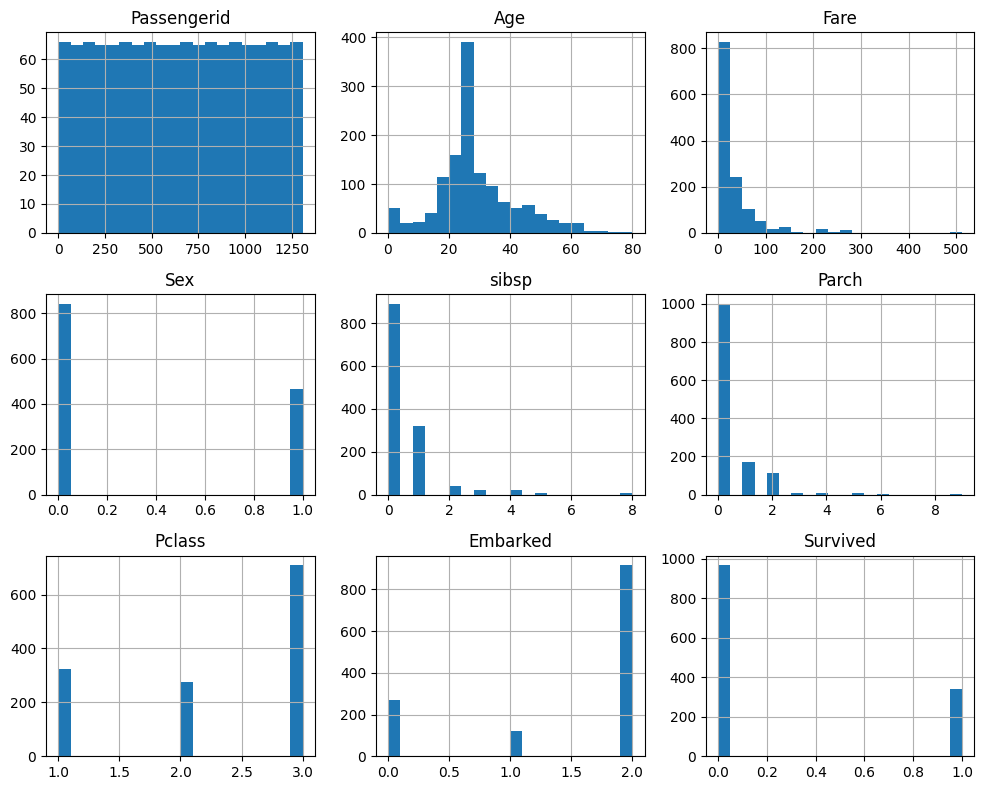

In [18]:
df = df.drop(columns=['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'])
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

### Box and whisker comparison (helps determine if transformation needs to occur to reduce weight of outliers)

# Feature Engineering

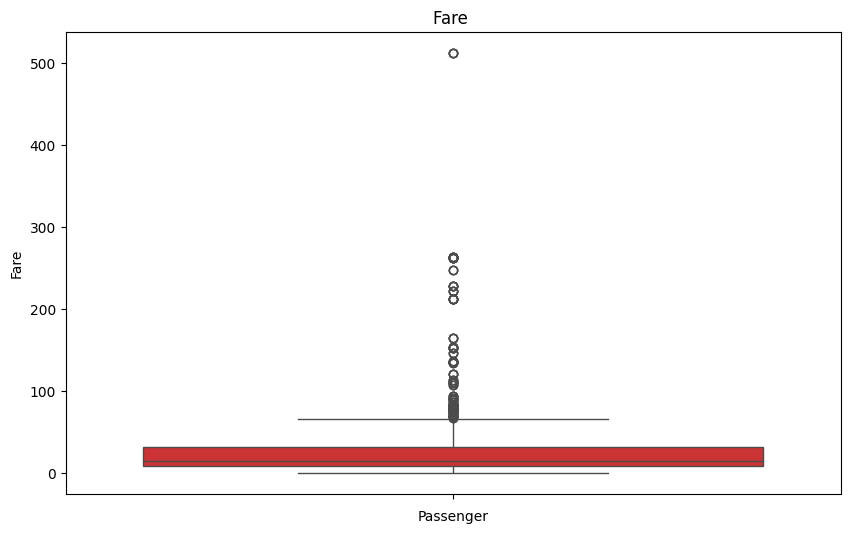

In [19]:
# Plot of fare before transformation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Fare'], palette='Set1')
plt.title('Fare ')
plt.xlabel('Passenger')
plt.ylabel('Fare')
plt.xticks(rotation=0)
plt.show()

In [20]:
# Transformation of fare
df['Fare'] = np.log1p(df['Fare'])

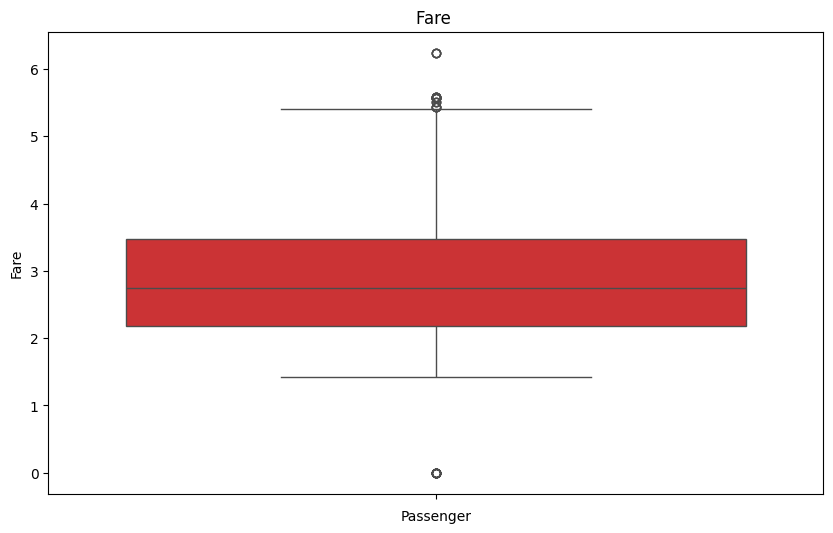

In [21]:
# Plot of fare after transformation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Fare'], palette='Set1')
plt.title('Fare ')
plt.xlabel('Passenger')
plt.ylabel('Fare')
plt.xticks(rotation=0)
plt.show()


### Correlation map (helps choose features to drop)

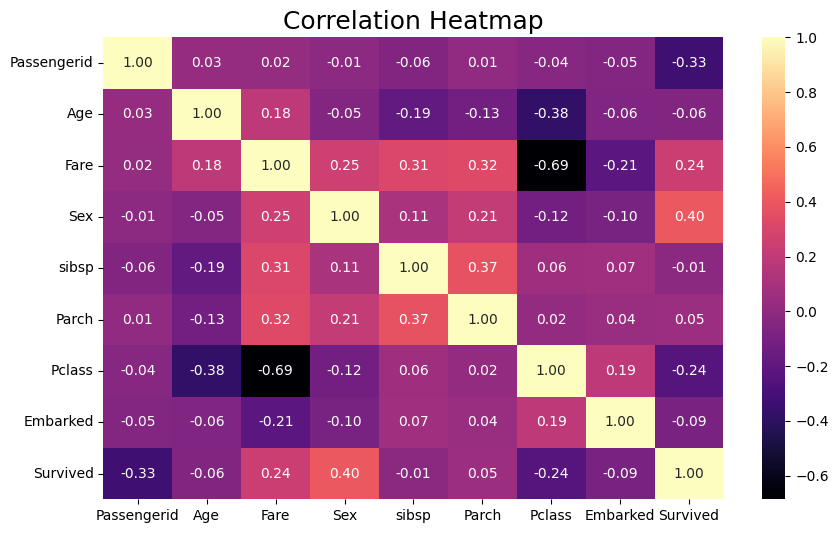

In [22]:
plt.figure(figsize=(10,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

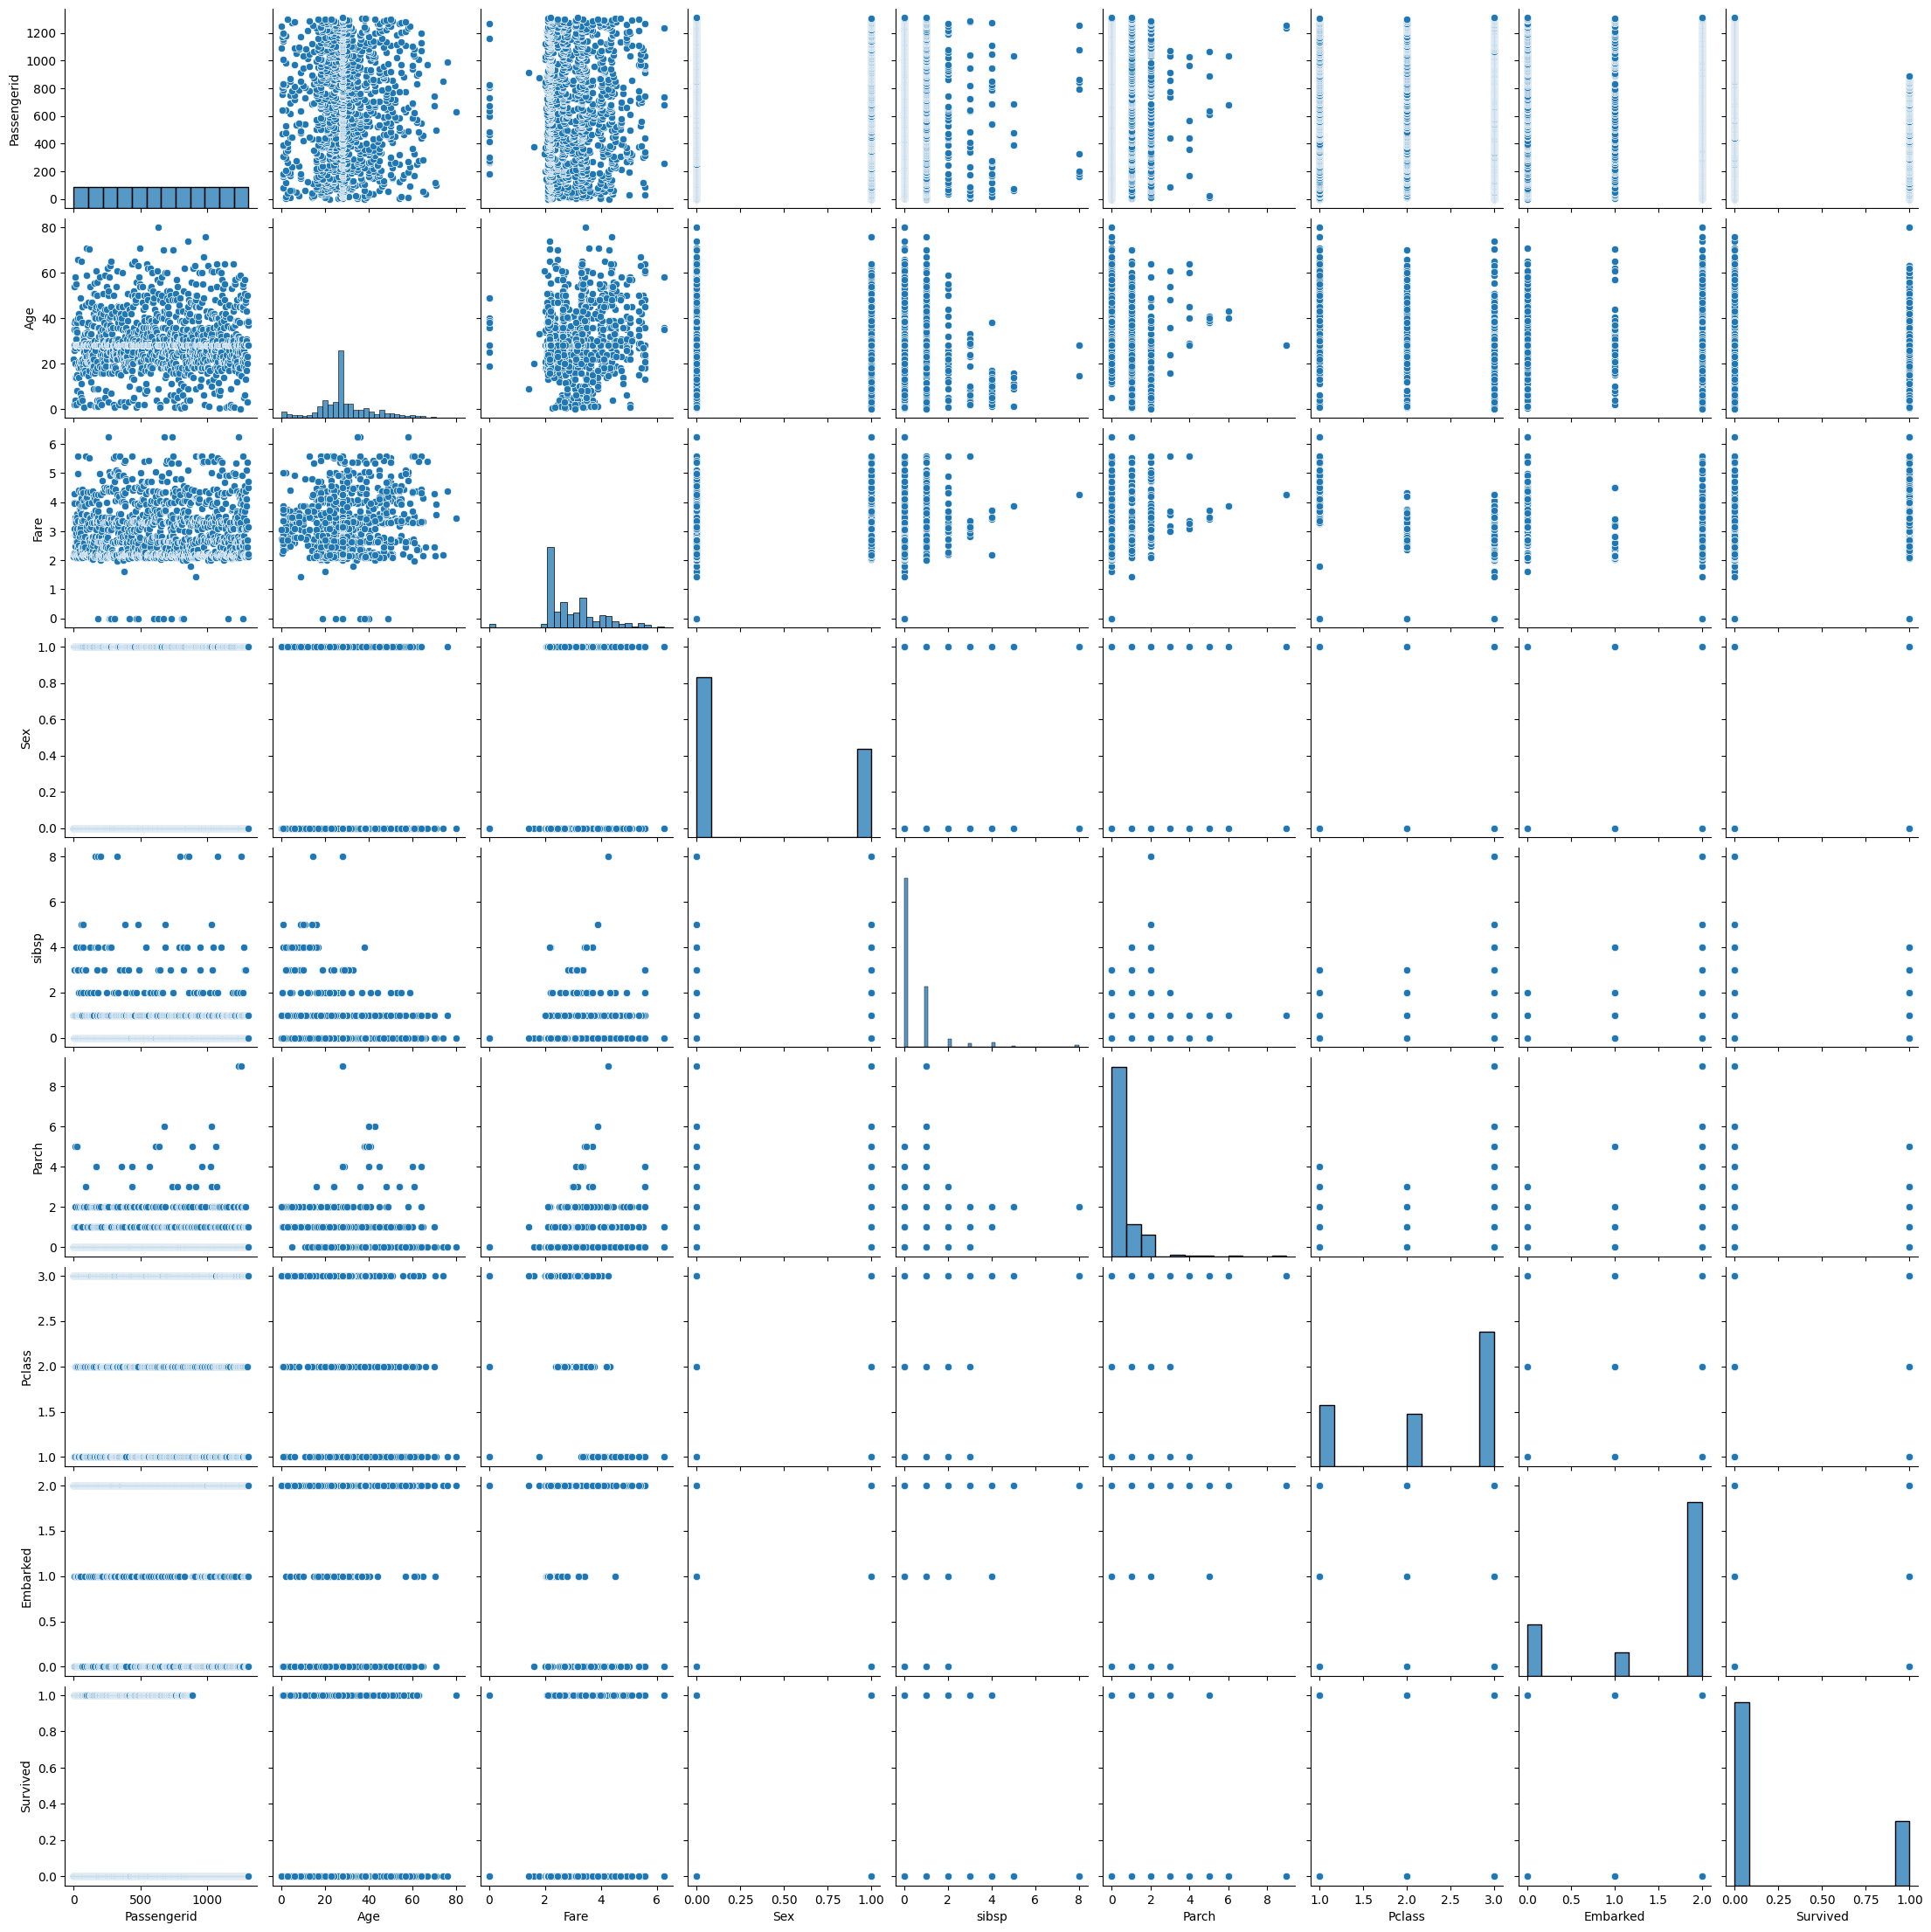

In [23]:
sns.pairplot(df)
plt.show()

### Encode categorical data

In [24]:
# Replace spaces of features with underscores and encode the categorical data to numerical values
#data = replace_spaces(data)
#data = clean_column_names(data)

# Drop these columns for now, need to convert them to a usable number rather than encoding them

# Turn data into values that the ML model can use by encoding (numbers)
df = encode_categorical(df,[]) # inputs

# Check the data to make sure it's processable
df #display_html(df.to_html(max_rows=10), raw=True)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,2.110213,0,1,0,3,2.0,0
1,2,38.0,4.280593,1,1,0,1,0.0,1
2,3,26.0,2.188856,1,0,0,3,2.0,1
3,4,35.0,3.990834,1,1,0,1,2.0,1
4,5,35.0,2.202765,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,2.202765,0,0,0,3,2.0,0
1305,1306,39.0,4.699571,1,0,0,1,0.0,0
1306,1307,38.5,2.110213,0,0,0,3,2.0,0
1307,1308,28.0,2.202765,0,0,0,3,2.0,0


## Training

In [30]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from catboost import CatBoostClassifier, Pool

## Cross validation helper function

In [31]:
def cross_validate_catboost(df, target_column, n_splits=10, catboost_params=None):
    """
    Performs cross-validation using CatBoostClassifier on the given DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing features and target.
    - target_column (str): The name of the target column in the DataFrame.
    - n_splits (int): Number of folds for StratifiedKFold. Default is 10.
    - catboost_params (dict): Parameters to pass to CatBoostClassifier. Default is None.

    Returns:
    - float: The average accuracy across all folds.
    - list: Accuracy scores for each fold.
    """
    # Separate features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Convert X and y to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Define cross-validation strategy
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Default CatBoost parameters if none provided
    if catboost_params is None:
        catboost_params = {
            'iterations': 1000,
            'learning_rate': 0.001,
            'depth': 6,
            'verbose': 0
        }

    # List to store results
    accuracy_scores = []

    # Cross-validation loop
    for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
        # Split data into training and testing sets for the current fold
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Compute class weights for the current fold
        class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weights_dict = dict(enumerate(class_weights))

        # Define CatBoost Classifier with updated class weights
        model = CatBoostClassifier(
            **catboost_params,
            class_weights=class_weights
        )

        # Train the model for the current fold
        model.fit(
            X_train, y_train,
            eval_set=(X_test, y_test),  # Use eval_set to provide validation data
            early_stopping_rounds=100
        )

        # Evaluate the model on the test set for the current fold
        accuracy = model.score(X_test, y_test)
        accuracy_scores.append(accuracy)
        print(f'Fold {fold + 1} Accuracy: {accuracy:.4f}')

    # Print and return average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)
    print(f'Average Accuracy: {average_accuracy:.4f}')
    
    return average_accuracy, accuracy_scores

## Cross validation

In [28]:
# Run cross-validation
print("\nCross validation run 1:\n\t")
average_accuracy1, accuracy_scores1 = cross_validate_catboost(
    df,
    target_column='Survived',
    n_splits=10,
    catboost_params={
        'iterations': 1000,
        'learning_rate': 0.001,
        'depth': 6,
        'verbose': 0
    }
)

print("\nCross validation run 2:\n\t")
average_accuracy2, accuracy_scores2 = cross_validate_catboost(
    df,
    target_column='Survived',
    n_splits=10,
    catboost_params={
        'iterations': 1000,
        'learning_rate': 0.0001,
        'depth': 10,
        'verbose': 0
    }
)

print("\nCross validation run 3:\n\t")
average_accuracy3, accuracy_scores3 = cross_validate_catboost(
    df,
    target_column='Survived',
    n_splits=10,
    catboost_params={
        'iterations': 1000,
        'learning_rate': 0.001,
        'depth': 2,
        'verbose': 0
    }
)

print("\nCross validation run 4:\n\t")
average_accuracy4, accuracy_scores4 = cross_validate_catboost(
    df,
    target_column='Survived',
    n_splits=10,
    catboost_params={
        'iterations': 1000,
        'learning_rate': 0.001,
        'depth': 1,
        'verbose': 0
    }
)

print("\nCross validation run 5:\n\t")
average_accuracy5, accuracy_scores5 = cross_validate_catboost(
    df,
    target_column='Survived',
    n_splits=10,
    catboost_params={
        'iterations': 350,
        'learning_rate': 0.001,
        'depth': 1,
        'verbose': 0
    }
)


Cross validation run 1:
	
Fold 1 Accuracy: 0.7786
Fold 2 Accuracy: 0.8702
Fold 3 Accuracy: 0.8473
Fold 4 Accuracy: 0.8473
Fold 5 Accuracy: 0.8702
Fold 6 Accuracy: 0.8397
Fold 7 Accuracy: 0.8397
Fold 8 Accuracy: 0.8779
Fold 9 Accuracy: 0.8244
Fold 10 Accuracy: 0.8615
Average Accuracy: 0.8457

Cross validation run 2:
	
Fold 1 Accuracy: 0.7786
Fold 2 Accuracy: 0.8779
Fold 3 Accuracy: 0.8550
Fold 4 Accuracy: 0.8473
Fold 5 Accuracy: 0.8779
Fold 6 Accuracy: 0.8244
Fold 7 Accuracy: 0.8397
Fold 8 Accuracy: 0.8779
Fold 9 Accuracy: 0.8397
Fold 10 Accuracy: 0.8615
Average Accuracy: 0.8480

Cross validation run 3:
	
Fold 1 Accuracy: 0.8244
Fold 2 Accuracy: 0.8473
Fold 3 Accuracy: 0.8626
Fold 4 Accuracy: 0.8168
Fold 5 Accuracy: 0.8702
Fold 6 Accuracy: 0.8168
Fold 7 Accuracy: 0.8626
Fold 8 Accuracy: 0.8855
Fold 9 Accuracy: 0.8550
Fold 10 Accuracy: 0.8769
Average Accuracy: 0.8518

Cross validation run 4:
	
Fold 1 Accuracy: 0.8244
Fold 2 Accuracy: 0.8397
Fold 3 Accuracy: 0.8626
Fold 4 Accuracy: 0.855

# Analysis

ROC AUC: 0.9158


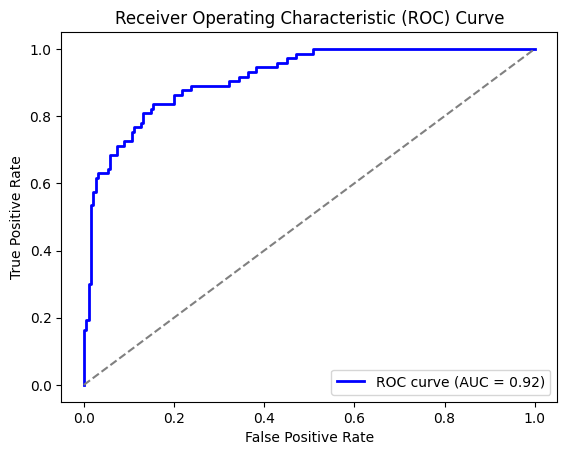

In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'model' is your trained CatBoostClassifier
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (Survived)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc:.4f}')

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
